In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images-dataset/data/horses/horse-26.jpg
/kaggle/input/images-dataset/data/horses/horse-193.jpg
/kaggle/input/images-dataset/data/horses/horse-41.jpg
/kaggle/input/images-dataset/data/horses/horse-176.jpg
/kaggle/input/images-dataset/data/horses/horse-46.jpg
/kaggle/input/images-dataset/data/horses/horse-3.jpg
/kaggle/input/images-dataset/data/horses/horse-183.jpg
/kaggle/input/images-dataset/data/horses/horse-166.jpg
/kaggle/input/images-dataset/data/horses/horse-111.jpg
/kaggle/input/images-dataset/data/horses/horse-61.jpg
/kaggle/input/images-dataset/data/horses/horse-56.jpg
/kaggle/input/images-dataset/data/horses/horse-125.jpg
/kaggle/input/images-dataset/data/horses/horse-11.jpg
/kaggle/input/images-dataset/data/horses/horse-79.jpg
/kaggle/input/images-dataset/data/horses/horse-168.jpg
/kaggle/input/images-dataset/data/horses/horse-133.jpg
/kaggle/input/images-dataset/data/horses/horse-29.jpg
/kaggle/input/images-dataset/data/horses/horse-58.jpg
/kaggle/input/images-

In [2]:
import os
import cv2
import matplotlib.pyplot as plt


In [3]:
# Define the path to the dataset
dataset_path = '/kaggle/input/images-dataset'


In [4]:
image_file=os.listdir('/kaggle/input/images-dataset')

In [5]:
import os
from PIL import Image

# Set dataset path
dataset_path = '/kaggle/input/images-dataset/data'

# Categories
categories = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

X, y = [], []  # Image data and labels

for category in categories:
    category_path = os.path.join(dataset_path, category)
    
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        
        img = Image.open(image_path)  # Open the image
        X.append(img)  # Store the image as a PIL object
        y.append(category)  # Store label

print(f"Loaded {len(X)} images.")


Loaded 1803 images.


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Load train data
train_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify subset as training data
)

# Load validation data
validation_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify subset as validation data
)

Found 2887 images belonging to 8 classes.
Found 719 images belonging to 8 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:

# Step 1: Build the CNN Model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the results to feed into a fully connected layer
    Flatten(),
    
    # Fully connected layer
    Dense(128, activation='relu'),
    
    # Dropout to prevent overfitting
    Dropout(0.5),
    
    # Output layer (number of classes = 8 in this case)
    Dense(8, activation='softmax')  # 8 classes so 8 outputs
])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 2: Compile the Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])



In [11]:
# Model summary to see the layers
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,992 (42.61 MB)

 Trainable params: 11,169,992 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 3: Train the Model
history = model.fit(
    train_ds,  # Training data
    epochs=10,  # Number of epochs
    validation_data=validation_ds  # Validation data
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726838036.924584     118 service.cc:145] XLA service 0x7c0d74006790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726838036.924670     118 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726838036.924677     118 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/91 ━━━━━━━━━━━━━━━━━━━━ 16:03 11s/step - accuracy: 0.0938 - loss: 2.1452

I0000 00:00:1726838043.997572     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/91 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.4505 - loss: 1.9183 - val_accuracy: 0.1599 - val_loss: 1.8986
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5255 - loss: 1.3550 - val_accuracy: 0.2434 - val_loss: 1.8987
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.5524 - loss: 1.2423 - val_accuracy: 0.2225 - val_loss: 1.8703
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5446 - loss: 1.1310 - val_accuracy: 0.1433 - val_loss: 3.0166
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5474 - loss: 1.0571 - val_accuracy: 0.1266 - val_loss: 3.3577
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.5472 - loss: 0.9992 - val_accuracy: 0.1669 - val_loss: 3.4602
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5633 - loss: 0.9761 - val_accuracy: 0.1266 - val_loss: 3.4252
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.5634 - loss: 0.9045 - val_accuracy: 0.1822 - val_loss

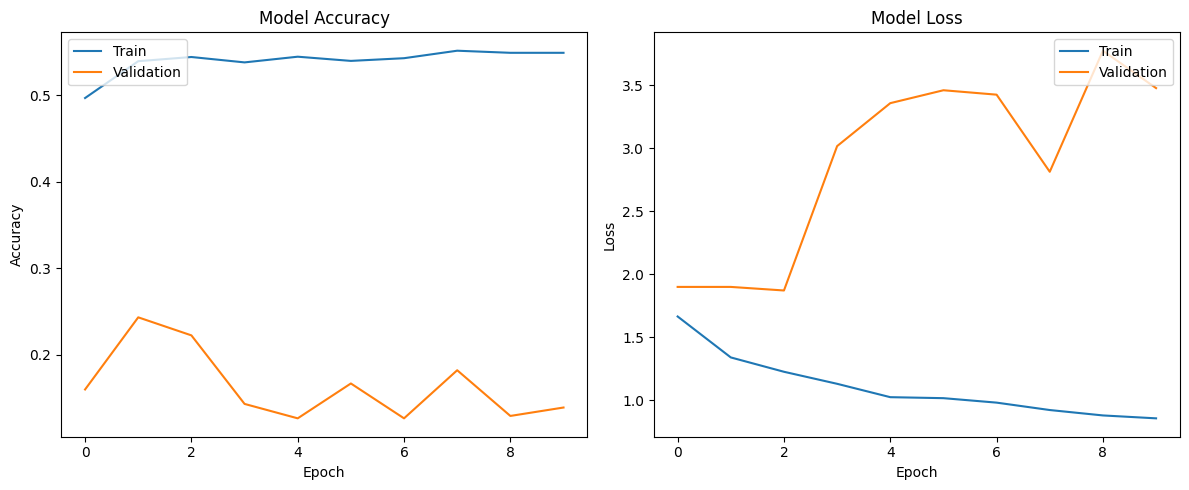

In [13]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# **EfficientNet**

In [15]:

# Load EfficientNetB5 model, pre-trained on ImageNet
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the base model layers
base_model.trainable = False


115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
# Build the model
model = Sequential([
    base_model,  # Add the base model
    GlobalAveragePooling2D(),  # Add global average pooling layer
    Dense(1024, activation='relu'),  # Add a dense layer
    Dense(512, activation='relu'),   # Add another dense layer
    Dense(8, activation='softmax')   # Output layer (8 classes for your dataset)
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
# Summary of the model
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ ?                      │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,513,527 (108.77 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 28,513,527 (108.77 MB)

In [19]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10  # Adjust epochs as needed
)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.4892 - loss: 1.7426 - val_accuracy: 0.5007 - val_loss: 1.6457
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.4919 - loss: 1.6691 - val_accuracy: 0.5007 - val_loss: 1.6461
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.5017 - loss: 1.6544 - val_accuracy: 0.5007 - val_loss: 1.6593
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.5161 - loss: 1.6082 - val_accuracy: 0.5007 - val_loss: 1.6787
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.5012 - loss: 1.6484 - val_accuracy: 0.5007 - val_loss: 1.6434
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.4978 - loss: 1.6460 - val_accuracy: 0.5007 - val_loss: 1.6604
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.4878 - loss: 1.6717 - val_accuracy: 0.5007 - val_loss: 1.6481
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.5003 - loss: 1.6504 - val_accura

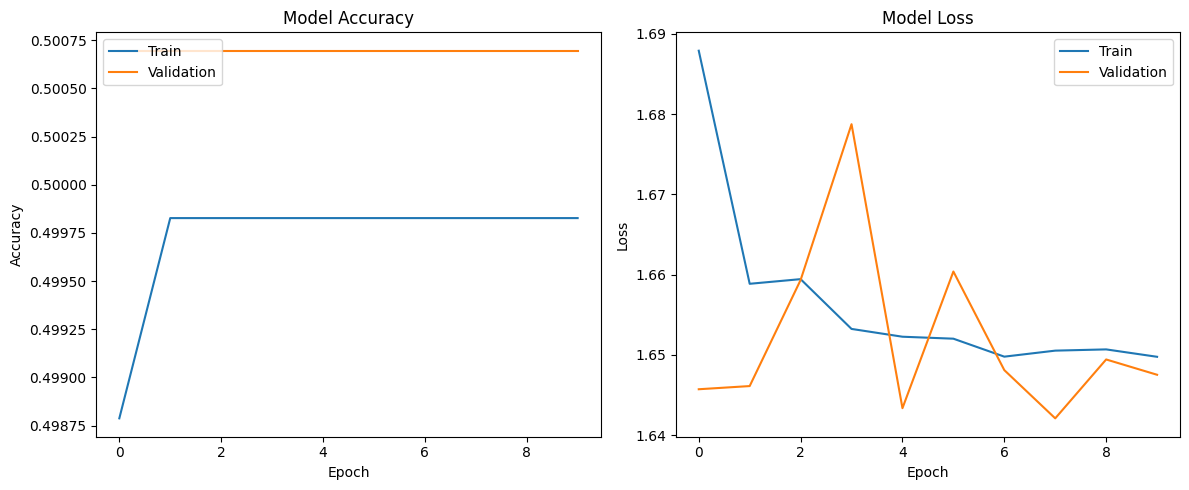

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# **DenseNet121**

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential()

# Add the DenseNet121 base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)

# Add global average pooling
model.add(GlobalAveragePooling2D())

# Add a fully connected layer
model.add(Dense(1024, activation='relu'))

# Add the output layer (8 classes, using softmax activation)
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Fit the model on the dataset
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10  # You can increase the number of epochs as needed
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 6,953,856 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/10
71/91 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.5148 - loss: 1.4959

I0000 00:00:1726838764.051722     116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 28 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion', 492 bytes spill stores, 456 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion_1', 368 bytes spill stores, 328 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_slice_fusion', 48 bytes spill stores, 48 bytes spill loads



91/91 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.5173 - loss: 1.4312 - val_accuracy: 0.1335 - val_loss: 15.3296
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 316ms/step - accuracy: 0.5517 - loss: 0.9680 - val_accuracy: 0.3102 - val_loss: 3.9199
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.5357 - loss: 0.8386 - val_accuracy: 0.1599 - val_loss: 3.4886
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 307ms/step - accuracy: 0.5595 - loss: 0.7780 - val_accuracy: 0.3380 - val_loss: 2.2277
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.5823 - loss: 0.7203 - val_accuracy: 0.2337 - val_loss: 2.1664
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.5772 - loss: 0.7295 - val_accuracy: 0.1140 - val_loss: 3.7249
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - accuracy: 0.5658 - loss: 0.7448 - val_accuracy: 0.2809 - val_loss: 2.0400
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - accuracy: 0.5698 - loss: 0.7025 - val_accuracy: 0.1530

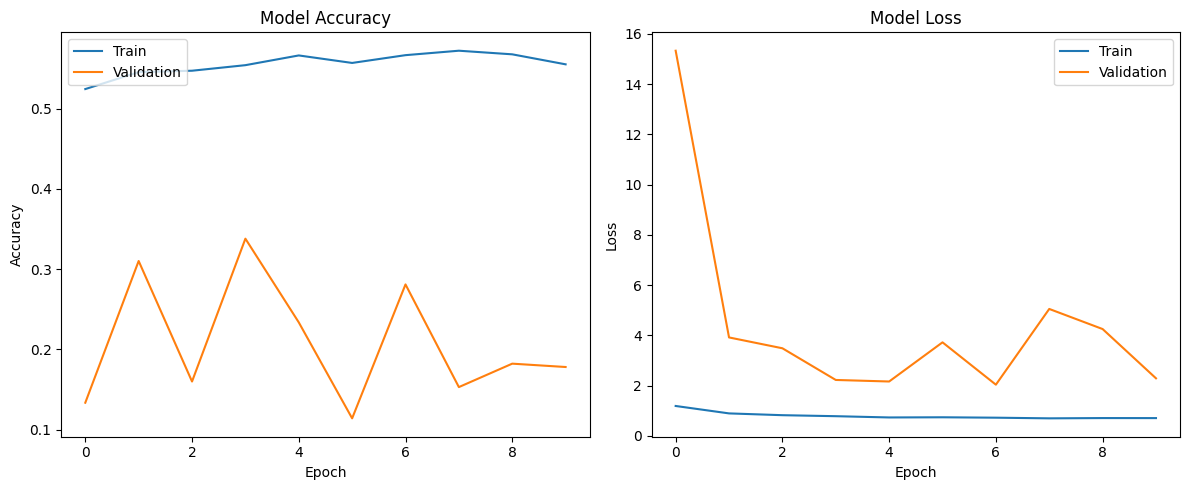

In [22]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# **Optimized Densenet121**

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()

Epoch 1/30
71/91 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.2837 - loss: 3.2930

I0000 00:00:1726839310.787429     116 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 28 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion', 492 bytes spill stores, 456 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_compare_reduce_slice_fusion_1', 368 bytes spill stores, 328 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_slice_fusion', 48 bytes spill stores, 48 bytes spill loads



91/91 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.3000 - loss: 3.1812 - val_accuracy: 0.2503 - val_loss: 23.8649 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 318ms/step - accuracy: 0.5053 - loss: 1.9085 - val_accuracy: 0.2045 - val_loss: 29.9666 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.5358 - loss: 1.6793 - val_accuracy: 0.1613 - val_loss: 22.1444 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 308ms/step - accuracy: 0.5416 - loss: 1.5233 - val_accuracy: 0.1864 - val_loss: 24.5924 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 314ms/step - accuracy: 0.5426 - loss: 1.4935 - val_accuracy: 0.1043 - val_loss: 16.6836 - learning_rate: 1.0000e-04
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step - accuracy: 0.5437 - loss: 1.4449 - val_accuracy: 0.1154 - val_loss: 8.7187 - learning_rate: 1.0000e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - accuracy: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,536,026 (85.97 MB)

 Trainable params: 7,483,784 (28.55 MB)

 Non-trainable params: 84,672 (330.75 KB)

 Optimizer params: 14,967,570 (57.10 MB)

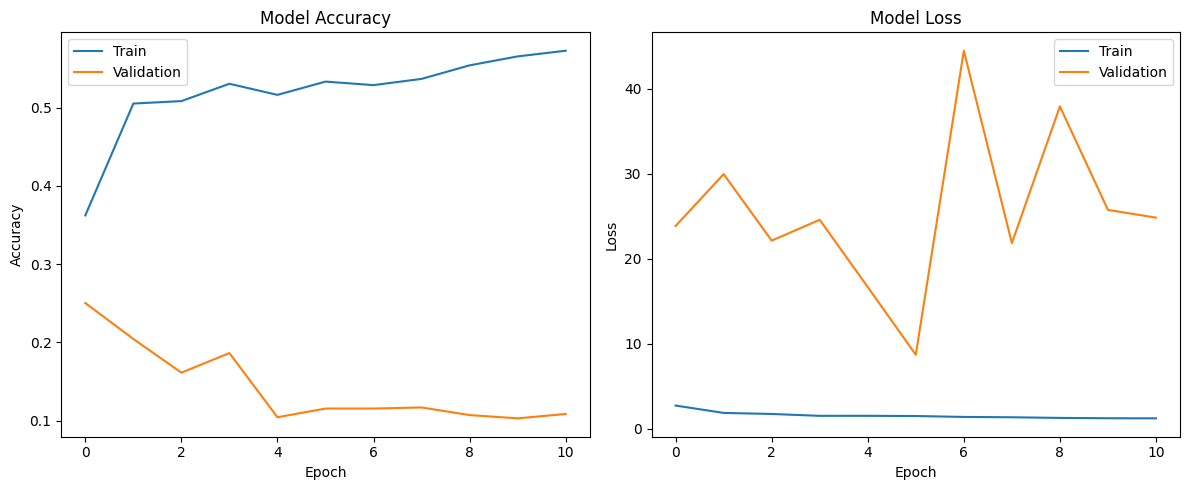

In [24]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# ***Optimized EfficientNet***

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()


Epoch 1/30
50/91 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.2208 - loss: 3.7440

I0000 00:00:1726840073.994505     117 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 52 bytes spill stores, 52 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion', 216 bytes spill stores, 216 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 216 bytes spill stores, 216 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion', 376 bytes spill stores, 376 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_5', 24 bytes spill stores, 24 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 32 bytes spill stores, 32 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_8', 32 bytes spill stores, 32 b

91/91 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.2578 - loss: 3.5947 - val_accuracy: 0.0584 - val_loss: 2.9852 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 531ms/step - accuracy: 0.4736 - loss: 2.3266 - val_accuracy: 0.4298 - val_loss: 2.7269 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 522ms/step - accuracy: 0.5273 - loss: 2.0511 - val_accuracy: 0.4965 - val_loss: 2.6264 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 526ms/step - accuracy: 0.5456 - loss: 2.0192 - val_accuracy: 0.4631 - val_loss: 2.5492 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 523ms/step - accuracy: 0.5632 - loss: 1.8132 - val_accuracy: 0.3658 - val_loss: 2.7607 - learning_rate: 1.0000e-04
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 523ms/step - accuracy: 0.5421 - loss: 1.8749 - val_accuracy: 0.2364 - val_loss: 4.8379 - learning_rate: 1.0000e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 48s 522ms/step - accuracy: 0.5576

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ (None, 7, 7, 2048)     │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,358,769 (337.06 MB)

 Trainable params: 29,395,000 (112.13 MB)

 Non-trainable params: 173,767 (678.78 KB)

 Optimizer params: 58,790,002 (224.27 MB)

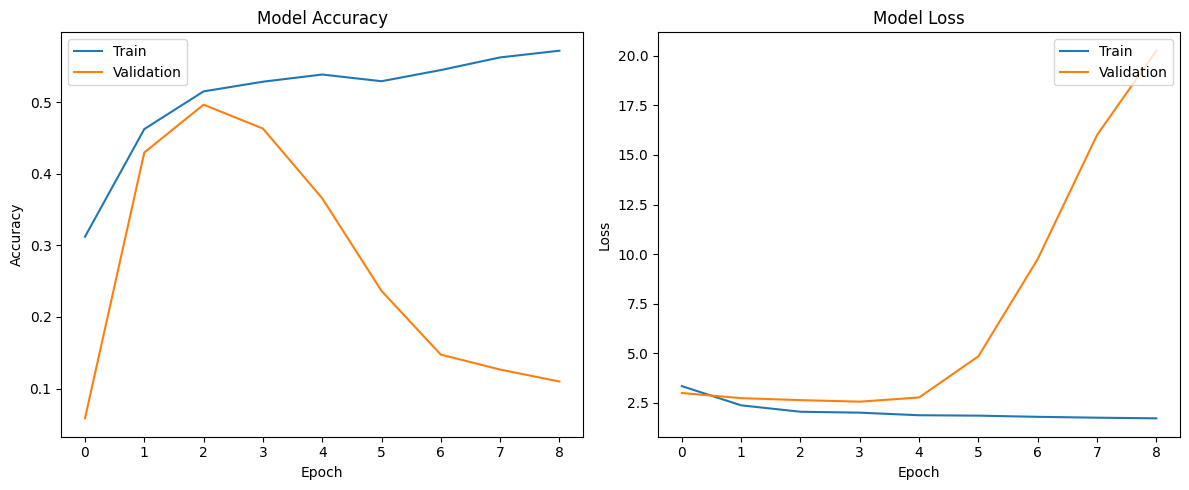

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the history object from model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


# ****Data Preprocessing****

In [27]:
# Data augmentation for better generalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Random rotations
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    horizontal_flip=True,     # Flip horizontally
    fill_mode='nearest',      # Fill any missing pixels
    validation_split=0.2      # Split for validation
)

# Create training and validation sets
train_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_ds = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2887 images belonging to 8 classes.
Found 719 images belonging to 8 classes.


# **Optimized EfficientNet after Preprocessnig**

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential()
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# Summary
model.summary()


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.2621 - loss: 3.5497 - val_accuracy: 0.0584 - val_loss: 3.1155 - learning_rate: 1.0000e-04
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 58s 606ms/step - accuracy: 0.4923 - loss: 2.2689 - val_accuracy: 0.1377 - val_loss: 2.8556 - learning_rate: 1.0000e-04
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 57s 593ms/step - accuracy: 0.5384 - loss: 2.0602 - val_accuracy: 0.4951 - val_loss: 2.6354 - learning_rate: 1.0000e-04
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.5371 - loss: 1.9701 - val_accuracy: 0.3741 - val_loss: 2.6673 - learning_rate: 1.0000e-04
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 83s 605ms/step - accuracy: 0.5651 - loss: 1.8266 - val_accuracy: 0.2100 - val_loss: 3.2254 - learning_rate: 1.0000e-04
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 57s 591ms/step - accuracy: 0.5532 - loss: 1.8201 - val_accuracy: 0.1711 - val_loss: 7.7566 - learning_rate: 1.0000e-04
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 57s 591ms/step - accuracy: 0.5525

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb5 (Functional)     │ (None, 7, 7, 2048)     │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,358,769 (337.06 MB)

 Trainable params: 29,395,000 (112.13 MB)

 Non-trainable params: 173,767 (678.78 KB)

 Optimizer params: 58,790,002 (224.27 MB)

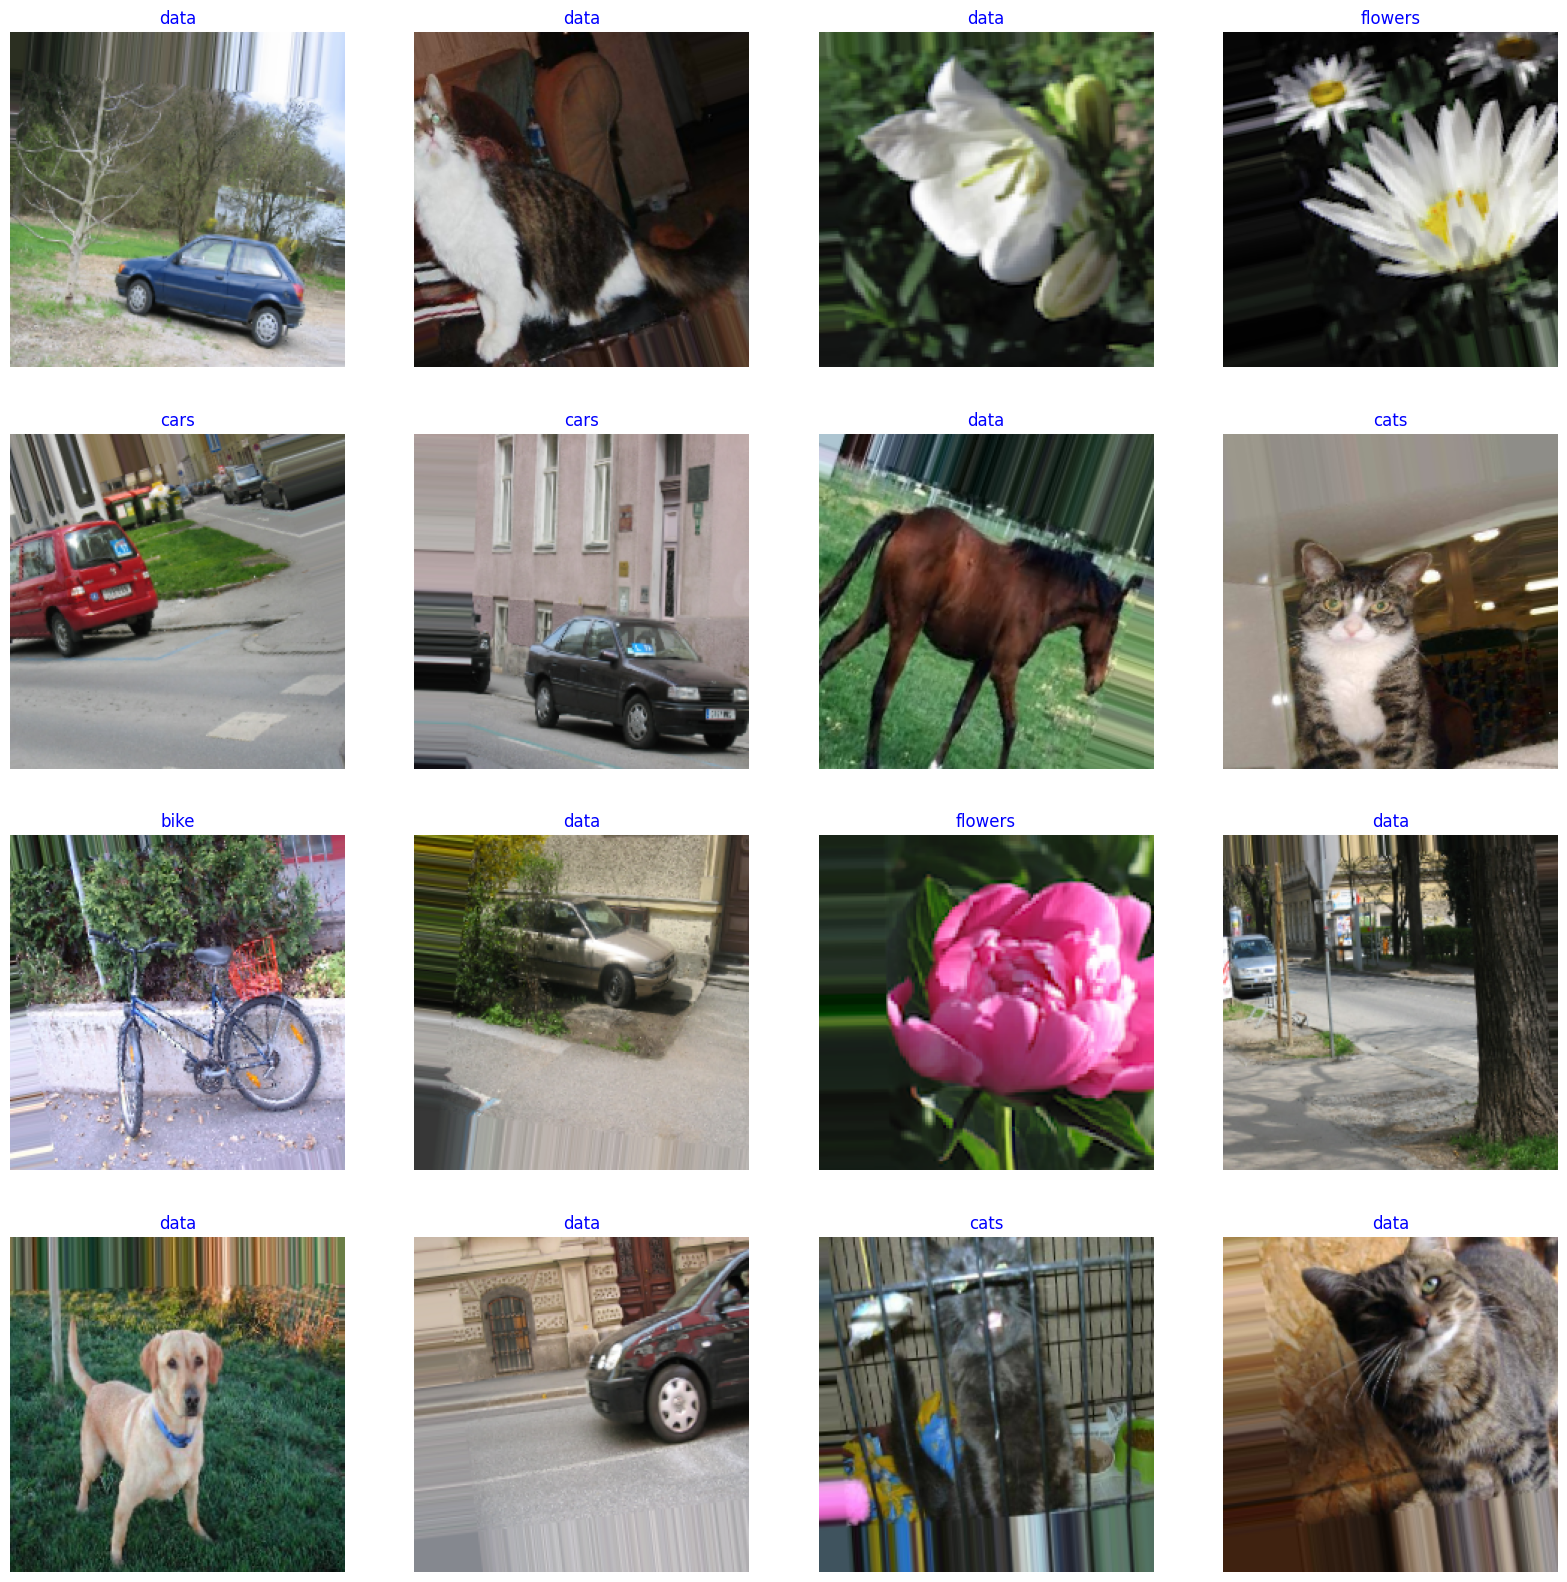

In [30]:
# Get class-to-index dictionary and class names
class_dict = train_ds.class_indices  # Using train_ds instead of train_gen
classes = list(class_dict.keys())

# Get a batch of images and labels
images, labels = next(train_ds)

# Plot the images
plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Display the image (no need to divide by 255 again)
    plt.imshow(images[i])
    
    # Get the predicted class name for the image
    class_index = np.argmax(labels[i])
    class_name = classes[class_index]
    
    # Set the title to the class name
    plt.title(class_name, color='blue', fontsize=12)
    
    # Remove axis lines
    plt.axis('off')

# Show the plot
plt.show()
